This Exploratory Data Analysis will review dog adoption data from Needy Paws Rescue.

import the necessary libraries

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import the dataset

In [114]:
data = pd.read_csv('/Users/robineastwood/Desktop/CoderGirl_2020/Needy_Paws_project/NeedyPawsMaster.csv')

As we can see below, our primary feature columns are Heartworm Positive, Breed, Sex, Age Group When Rescued, Color, and Size. Days in Rescue will serve as a target output variable, as we attempt to determine whether our predictor variables have an impact on this length of time. 

In [115]:
data.head()

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium
1,Abby,11,N,Dachshund,F,Adult,Tan,Small
2,Abby,31,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83,N,Chihuahua,F,Adult,Tan,Small


Let's set our index column to be Name of Dog.

In [116]:
data = data.set_index('Name of Dog')

In [117]:
data.head()

,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
Name of Dog,,,,,,,
Aaron,30,N,Labrador,M,Young,Yellow,Medium
Abby,11,N,Dachshund,F,Adult,Tan,Small
Abby,31,N,Unknown,F,Adult,Brindle,Medium
Abby,47,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
Abby,83,N,Chihuahua,F,Adult,Tan,Small


We have one feature that is numerical (Days in Rescue), the rest are categorical.

In [118]:
data.dtypes

Days in Rescue             int64
Heartworm Positive        object
Breed                     object
Sex                       object
Age Group When Rescued    object
Color                     object
Size                      object
dtype: object

Our data consists of 3088 rows, with 7 descriptive feature columns:

In [119]:
data.shape

(3088, 7)

Since we only have one feature of numerical data, the describe function is limited. We see that the mean days in rescue is around 48, but some dogs were adopted immediately (the minimum days in rescue is 0) and some dogs took as log as 812 days to be adopted. I can see that we're not missing any data in this column, since the count 3088 matches the results in data.shape.

In [120]:
data.describe()

,Days in Rescue
count,3088.000000
mean,47.679728
std,62.371584
min,0.000000
25%,16.000000
50%,29.000000
75%,60.000000
max,812.000000


The 812 days may be an outlier that needs to be handled. Let's look at our Days in Rescue column, sorted in descending order so we can see what the data looks like. Since the data descends gradually rather than a sharp, distinct outlying value, I'm not going to drop any rows yet. 

In [121]:
data.sort_values(by='Days in Rescue', ascending=False)[0:20]

,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
Name of Dog,,,,,,,
Henry,812,N,Terrier,M,Young,Multicolor,Large
Coach,784,N,Pitbull,M,Puppy,Multicolor,Medium
Jessica,765,N,Boxer,F,Senior,Tan,Large
Snookie,759,N,Pitbull,F,Adult,White,Medium
Braxton,698,N,Pitbull,F,Adult,Brindle,Medium
Snow White,528,N,Pitbull,F,Adult,White,Medium
Queenie,510,N,Pitbull,F,Adult,Multicolor,Medium
Merlin,460,N,Pitbull,M,Young,Multicolor,Medium
Trina,459,N,Mixed Breed (Non-Pitbull),F,Adult,Black,Small


Let's take it a step further and plot a histogram. If there are any data points more than 3 standard deviations from the mean, we'll drop them.

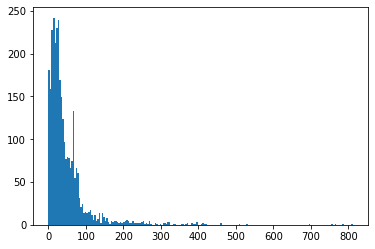

In [145]:
#I need some help on this one! Since it's not a normal distribution....

mu = data['Days in Rescue'].mean()
sigma = data['Days in Rescue'].std()
x = data['Days in Rescue']
num_bins = 200

plt.hist(x, bins=num_bins)
plt.show()

Let's look at each of our predictor variables to see how many categories we are working with in each:

In [62]:
print("There are " + str(data['Breed'].nunique()) + " labels for Breed")
print("There are " + str(data['Sex'].nunique()) + " labels for Sex")
print("There are " + str(data['Age Group When Rescued'].nunique()) + " labels for Age Group")
print("There are " + str(data['Color'].nunique()) + " labels for Color")
print("There are " + str(data['Size'].nunique()) + " labels for Size")

There are 103 labels for Breed
There are 2 labels for Sex
There are 5 labels for Age Group
There are 11 labels for Color
There are 4 labels for Size


I'm curious about what the average length of time in rescue is for each of our predictor variables. When considering breed, rather than view a ranking of all 103 of them, I'll make a bar plot to look at the 10 breeds that took the longest to be adopted on average, and another bar plot to see the 10 breeds that were adopted most quickly on average:

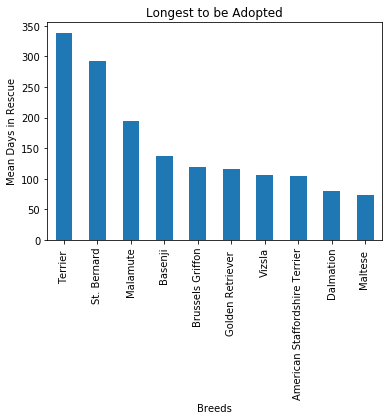

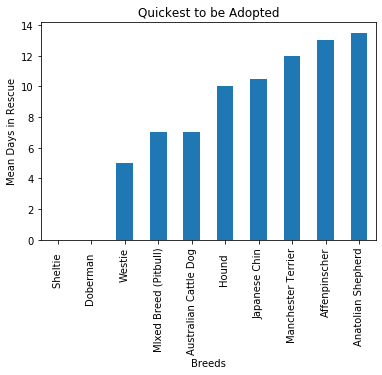

In [81]:
breed = data.groupby('Breed').mean()
breed_longest = breed.sort_values(by = 'Days in Rescue',ascending = False)[0:10]
breed_shortest = breed.sort_values(by = 'Days in Rescue')[0:10]

breed_longest['Days in Rescue'].plot(kind='bar')
plt.xlabel('Breeds')
plt.ylabel('Mean Days in Rescue')
plt.title('Longest to be Adopted')
plt.show()

breed_shortest['Days in Rescue'].plot(kind='bar')
plt.xlabel('Breeds')
plt.ylabel('Mean Days in Rescue')
plt.title('Quickest to be Adopted')
plt.show()

Were there any differences in average time in rescue for Male vs. Female?

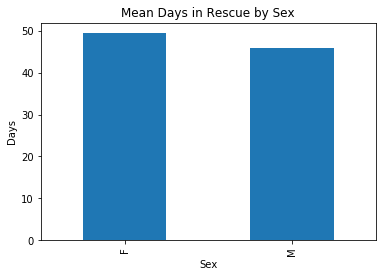

In [82]:
sex = data.groupby('Sex').mean()

sex['Days in Rescue'].plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Days')
plt.title('Mean Days in Rescue by Sex')
plt.show()

What was the average length of time in rescue for each age group? It's not surprising that puppies were adopted most quickly.

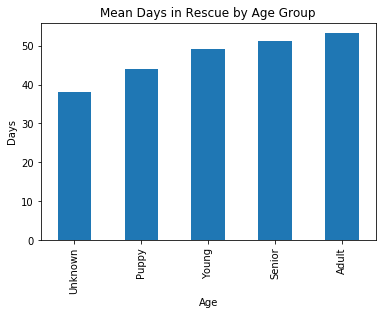

In [89]:
age = data.groupby('Age Group When Rescued').mean()

age_sorted = age.sort_values(by = 'Days in Rescue')
age_sorted['Days in Rescue'].plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Days')
plt.title('Mean Days in Rescue by Age Group')
plt.show()

Let's look at which color dogs were adopted most quickly:

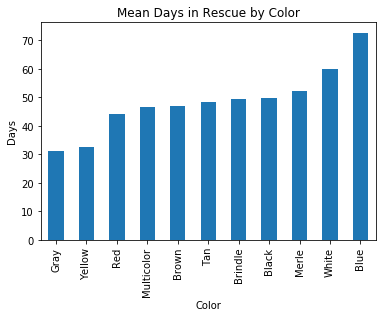

In [86]:
color = data.groupby('Color').mean()

color_sorted = color.sort_values(by = 'Days in Rescue')
color_sorted['Days in Rescue'].plot(kind='bar')
plt.xlabel('Color')
plt.ylabel('Days')
plt.title('Mean Days in Rescue by Color')
plt.show()

Did the dog's size make a dramatic difference in the length of time to be adopted?

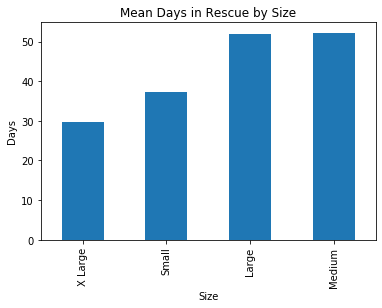

In [91]:
size = data.groupby('Size').mean()
size_sorted = size.sort_values(by = 'Days in Rescue')

size_sorted['Days in Rescue'].plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Days')
plt.title('Mean Days in Rescue by Size')
plt.show()